In [57]:
# Look coorelation between year and basic car info for CA 
# Need python 3.6 or lower for coreml

## Import and get data

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [59]:
df = pd.read_csv("data.csv")

In [60]:
df.head()

,License Plate,Make,Model,Year
0,3HFA512,DODGE,NEON HIGHLINE,1995
1,3TEL301,TOYOTA,CAMRY LE/XLE,1997
2,3JJR161,TOYOTA,COROLLA LE,1991
3,3MWJ553,TOYOTA,CAMRY XLE,1994
4,3FFU831,FORD,THUNDERBIRD LX,1993


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 4 columns):
License Plate    600 non-null object
Make             600 non-null object
Model            600 non-null object
Year             600 non-null int64
dtypes: int64(1), object(3)
memory usage: 18.8+ KB


In [62]:
df.describe()

,Year
count,600.000000
mean,2004.548333
std,9.383554
min,1982.000000
25%,1997.000000
50%,2004.000000
75%,2014.000000
max,2019.000000


## Clean Data

In [63]:
def firstCharacter(licensePlate):
    return int(licensePlate[0])

df["License Plate First Character"] = df["License Plate"].apply(firstCharacter)

In [64]:
df.head()

,License Plate,Make,Model,Year,License Plate First Character
0,3HFA512,DODGE,NEON HIGHLINE,1995,3
1,3TEL301,TOYOTA,CAMRY LE/XLE,1997,3
2,3JJR161,TOYOTA,COROLLA LE,1991,3
3,3MWJ553,TOYOTA,CAMRY XLE,1994,3
4,3FFU831,FORD,THUNDERBIRD LX,1993,3


In [65]:
# Remove duplicates
def lowerCase(string):
    return string.lower()

df["Make"] = df["Make"].apply(lowerCase)

In [66]:
df.head()

,License Plate,Make,Model,Year,License Plate First Character
0,3HFA512,dodge,NEON HIGHLINE,1995,3
1,3TEL301,toyota,CAMRY LE/XLE,1997,3
2,3JJR161,toyota,COROLLA LE,1991,3
3,3MWJ553,toyota,CAMRY XLE,1994,3
4,3FFU831,ford,THUNDERBIRD LX,1993,3


In [67]:
# Convert the make categories to a code
df["Make"] = pd.Categorical(df["Make"])
df["Make Code"] = df["Make"].cat.codes
df.head()

,License Plate,Make,Model,Year,License Plate First Character,Make Code
0,3HFA512,dodge,NEON HIGHLINE,1995,3,8
1,3TEL301,toyota,CAMRY LE/XLE,1997,3,43
2,3JJR161,toyota,COROLLA LE,1991,3,43
3,3MWJ553,toyota,CAMRY XLE,1994,3,43
4,3FFU831,ford,THUNDERBIRD LX,1993,3,10


In [68]:
# make = pd.get_dummies(df["Make"], drop_first = True)
# make.head()

In [69]:
# list(make)

In [70]:
# df.drop(['Make'], axis = 1, inplace = True)

In [71]:
# df = pd.concat([df, make], axis=1)

In [72]:
# df.head()

## Analyze Data

In [73]:
# There is a trend in increasing mean year with first number, but there is high std
df[df["License Plate First Character"] == 5].describe()

,Year,License Plate First Character,Make Code
count,100.000000,100.0,100.00000
mean,2001.350000,5.0,20.78000
std,5.677129,0.0,15.18677
min,1987.000000,5.0,0.00000
25%,1999.000000,5.0,9.50000
50%,2003.000000,5.0,15.00000
75%,2006.000000,5.0,35.50000
max,2008.000000,5.0,45.00000


In [74]:
df.groupby("License Plate First Character").describe()

Make Code                                     \
                                  count   mean        std  min   25%   50%   
License Plate First Character                                                
3                                 100.0  21.11  13.958014  2.0  10.0  15.0   
4                                 100.0  17.34  13.866769  0.0   6.0  14.0   
5                                 100.0  20.78  15.186770  0.0   9.5  15.0   
6                                 100.0  21.75  14.158108  0.0  10.0  16.0   
7                                 100.0  21.78  14.130403  0.0  10.0  21.0   
8                                 100.0  20.34  13.388688  0.0  10.0  16.5   

                                            Year                             \
                                75%   max  count     mean       std     min   
License Plate First Character                                                 
3                              31.0  43.0  100.0  1993.98  5.059205  1982.0   
4                              27.0  43.0  100.0  1997.46  4.850117  1984.0   
5                              35.5  45.0  100.0  2001.35  5.677129  1987.0   
6                              31.0  45.0  100.0  2006.42  6.549239  1989.0   
7                              31.0  45.0  100.0  2013.18  4.613069  1994.0   
8                              31.0  44.0  100.0  2014.90  5.127663  1996.0   

                                                                
                                   25%     50%     75%     max  
License Plate First Character                                   
3                              1992.00  1994.0  1996.0  2018.0  
4                              1995.75  1999.0  2001.0  2003.0  
5                              1999.00  2003.0  2006.0  2008.0  
6                              2003.00  2008.0  2011.0  2013.0  
7                              2012.75  2015.0  2016.0  2018.0  
8                              2014.00  2017.0  2018.0  2019.0

In [75]:
df.groupby("Make Code").mean()

,Year,License Plate First Character
Make Code,,
0,2000.000000,5.133333
1,2014.000000,7.000000
2,2004.578947,5.421053
3,2001.888889,5.222222
4,1998.666667,5.666667
5,2003.867925,5.471698
6,2001.636364,4.727273
7,1999.500000,4.000000
8,2001.695652,5.043478


In [76]:
# Make has a low correlation with car year
df.corr()

,Year,License Plate First Character,Make Code
Year,1.000000,0.816205,0.046594
License Plate First Character,0.816205,1.000000,0.036039
Make Code,0.046594,0.036039,1.000000


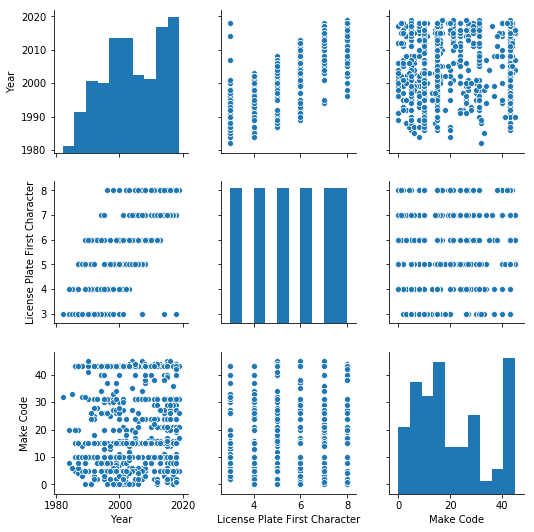

In [77]:
sns.pairplot(df)

In [78]:
# Some weird potential outliers for "3" 
# The 2010+ ones are trucks
test = df[df["License Plate First Character"] == 3]
test[test["Year"] > 2005]

,License Plate,Make,Model,Year,License Plate First Character,Make Code
22,3QJN146,chrysler,PACIFICA TOURING,2007,3,6
52,3QGC879,freightliner,CASCADIA 125,2014,3,11
71,3QZB850,freightliner,CASCADIA 126,2018,3,11


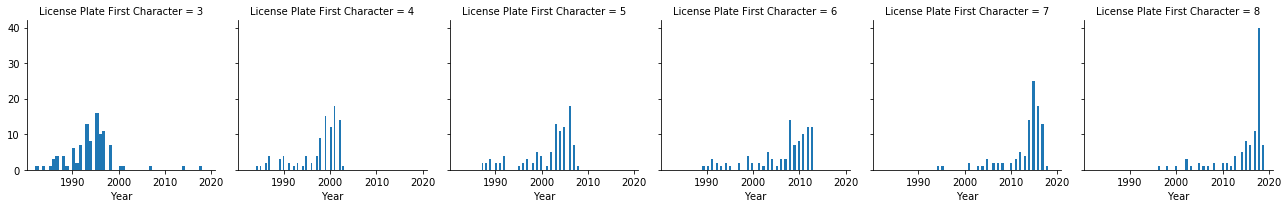

In [79]:
g = sns.FacetGrid(df, col="License Plate First Character")
g.map(plt.hist, "Year", bins = 50)

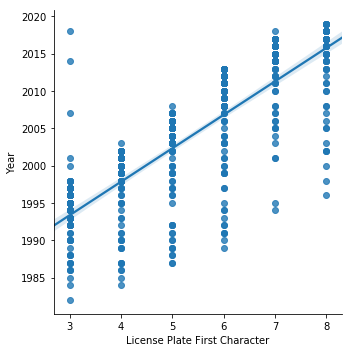

In [80]:
sns.lmplot(x = "License Plate First Character", y = "Year", data = df)

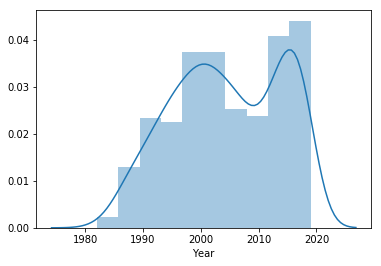

In [81]:
# Interestingly, a decline in number of cars somewhere between '07-10'. 
# Probably due to recession, less cars in that year were sold
# Large spike of cars in 2018
sns.distplot(df['Year'])

In [82]:
df.groupby("Year").apply(len)

Year
1982     1
1984     2
1985     2
1986     5
1987    10
1988     6
1989     8
1990    13
1991     9
1992    14
1993    16
1994    12
1995    23
1996    15
1997    20
1998    19
1999    24
2000    20
2001    24
2002    23
2003    21
2004    15
2005    18
2006    24
2007    14
2008    19
2009     7
2010    12
2011    15
2012    18
2013    20
2014    20
2015    33
2016    25
2017    24
2018    42
2019     7
dtype: int64

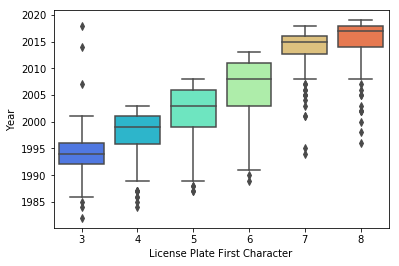

In [83]:
# Seems like more outliers on lower year
# It would make sense for lower year outliers for higher license plate because of used cars
# 5 and 6 seem to have wider spread
# 7 and 8 have more lower outliers
sns.boxplot(x = "License Plate First Character", y = "Year", data = df, palette = "rainbow")

## Train Test Split

In [84]:
X = df[["License Plate First Character", "Make Code"]]
y = df["Year"]

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [87]:
from sklearn.linear_model import LinearRegression

In [88]:
lm = LinearRegression()

In [89]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [90]:
# A one unit increase in license plate, increases year by ~4.6 years
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns = ["Coefficient"])
coeff_df

,Coefficient
License Plate First Character,4.655465
Make Code,0.014534


In [91]:
predictions = lm.predict(X_test)

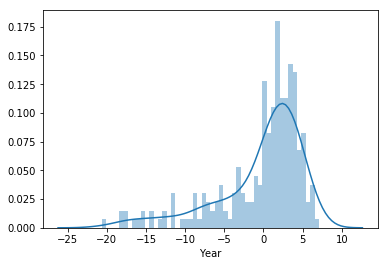

In [92]:
sns.distplot((y_test - predictions), bins=50);

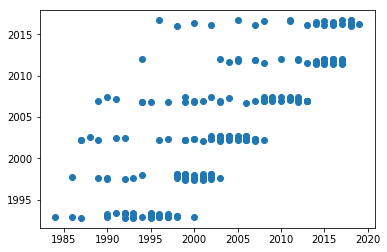

In [93]:
plt.scatter(y_test, predictions)

In [94]:
from sklearn import metrics
print("MAE:", metrics.mean_absolute_error(y_test, predictions))
print("MSE:", metrics.mean_squared_error(y_test, predictions))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4.047624741396016
MSE: 30.92182765163098
RMSE: 5.560739847505094


In [95]:
# Maybe another model is better?

## Core ML conversion

In [96]:
import coremltools 

In [97]:
coreml_model = coremltools.converters.sklearn.convert(lm,
                                                      ["License Plate First Character", "Make Code"], 
                                                      "Year")

In [98]:
# Set model metadata
coreml_model.author = "Kevin Chen"
coreml_model.license = "MIT"
coreml_model.short_description = "Predicts car year based on car info"

In [99]:
coreml_model.save('CarYearPredictor.mlmodel')

## Core ML Test Model

In [100]:
# Hmm... Model isn't very useful
# Load the model
model =  coremltools.models.MLModel('CarYearPredictor.mlmodel')

# Make predictions
predictions = model.predict({"License Plate First Character": 6, "Make Code": 5})

print(predictions)

{'Year': 2006.806449557033}


Conclusion:
Fun experiment, but need more categories to get different predictions. Currently all the weight is on the first license plate number. So the same number will result in the same predicted year. Essential this model is giving the mean year based on the license plate first character. Good news is there is an increasing year trend with increasing first number license plate number so my hypothesis was correct.

Data is a little bias potentially as I gathered data with assumption first number makes a difference. May have been better to get random CA license plate data and analyze with that data.

Possibly, knowing if the car is bought new or used would help refine the model. Maybe the other characters in the license plate make a difference, but would need to convert these numbers into machine readable format.
